In [2]:
import pandas as pd
import numpy as np

age5to14 = pd.read_csv('/Users/vanhale/Library/CloudStorage/OneDrive-UniversityofMaryland/BUDT 704 - Python/age-between-5-and-14.csv')

In [3]:
#setting index
base = age5to14.set_index(['Country', 'Year'])
base.head()
del base['Country Code']

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6840 entries, ('Afghanistan', 1990) to ('Zimbabwe', 2019)
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Self-harm                                   6840 non-null   int64
 1   Interpersonal violence                      6840 non-null   int64
 2   Drowning                                    6840 non-null   int64
 3   Malaria                                     6840 non-null   int64
 4   Fire, heat, and hot substances              6840 non-null   int64
 5   Neoplasms                                   6840 non-null   int64
 6   Digestive diseases                          6840 non-null   int64
 7   Cirrhosis and other chronic liver diseases  6840 non-null   int64
 8   Chronic respiratory diseases                6840 non-null   int64
 9   Chronic kidney disease                      6840 non-null   int64
 10  Ca

In [5]:
#Creating separate dataframes that we can use
idx = pd.IndexSlice
US = pd.DataFrame(base.loc[idx['United States', 1990 : 2019], :])
France = pd.DataFrame(base.loc[idx['France', 1990 : 2019], :])
Colombia = pd.DataFrame(base.loc[idx['Colombia', 1990 : 2019], :])
Bangladesh = pd.DataFrame(base.loc[idx['Bangladesh', 1990 : 2019], :])
Somalia = pd.DataFrame(base.loc[idx['Somalia', 1990 : 2019], :])

In [6]:
#Sum of death counts from all causes for each year > create new column
US['Totals'] = US.sum(axis=1)
France['Totals'] = France.sum(axis=1)
Colombia['Totals'] = Colombia.sum(axis=1)
Bangladesh['Totals'] = Bangladesh.sum(axis=1)
Somalia['Totals'] = Somalia.sum(axis=1)

In [7]:
#Drop first column for easy identification
US_new = US.droplevel(level=0)
Fra_new = France.droplevel(level=0)
Col_new = Colombia.droplevel(level=0)
Ban_new = Bangladesh.droplevel(level=0)
Som_new = Somalia.droplevel(level=0)

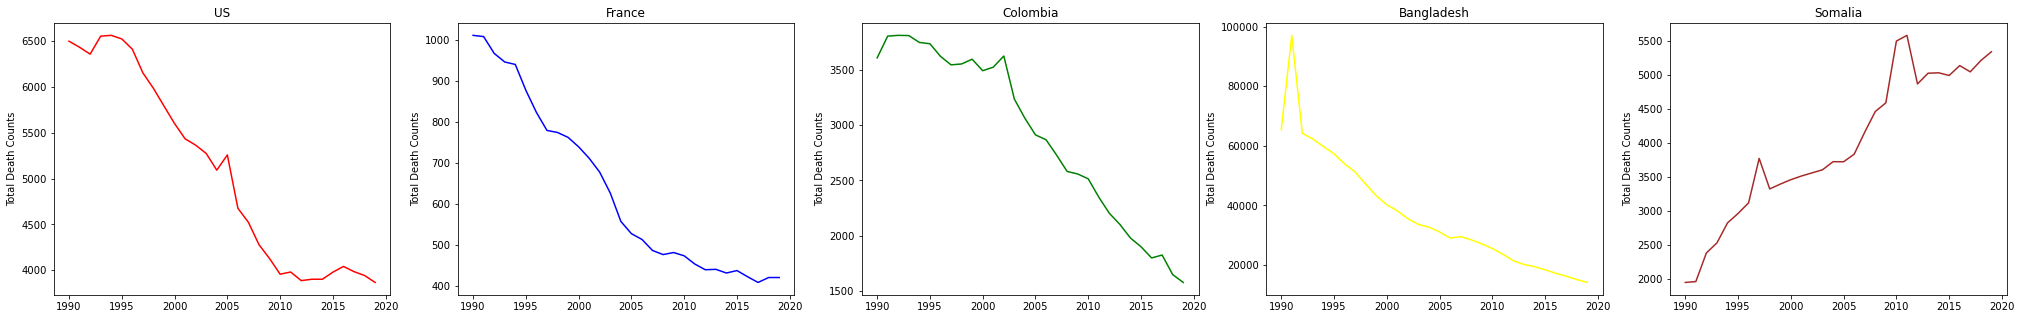

In [8]:
# Sample 1 - Showcase declining death counts over the years, with 5 individual plots
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,5)
fig.set_size_inches(35,5)
ax[0].plot(US_new.index, US_new['Totals'], color='red')
ax[1].plot(Fra_new.index, Fra_new['Totals'], color='blue')
ax[2].plot(Col_new.index, Col_new['Totals'], color='green')
ax[3].plot(Ban_new.index, Ban_new['Totals'], color='yellow')
ax[4].plot(Som_new.index, Som_new['Totals'], color='brown')
ax[0].set_title('US')
ax[1].set_title('France')
ax[2].set_title('Colombia')
ax[3].set_title('Bangladesh')
ax[4].set_title('Somalia')
ax[0].set_ylabel('Total Death Counts')
ax[1].set_ylabel('Total Death Counts')
ax[2].set_ylabel('Total Death Counts')
ax[3].set_ylabel('Total Death Counts')
ax[4].set_ylabel('Total Death Counts')
plt.show()

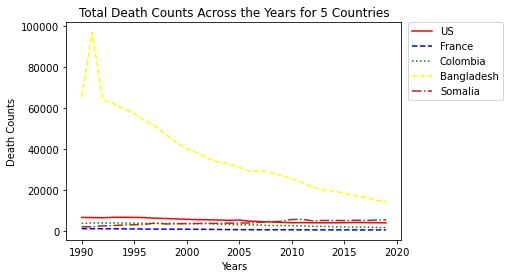

In [9]:
# Sample 2 - Showcase declining death counts over the years, combined into 1 plot > not too representative
import matplotlib.pyplot as plt
plt.plot(US_new.index, US_new['Totals'],color = 'red', label = "US")
plt.plot(Fra_new.index, Fra_new['Totals'], color='blue',linestyle = 'dashed', label = "France")
plt.plot(Col_new.index, Col_new['Totals'], color='green',linestyle = 'dotted', label = 'Colombia')
plt.plot(Ban_new.index, Ban_new['Totals'], color='yellow',linestyle = 'dashed', label = 'Bangladesh')
plt.plot(Som_new.index, Som_new['Totals'], color='brown',linestyle = 'dashdot', label = 'Somalia') 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Total Death Counts Across the Years for 5 Countries')
plt.xlabel('Years')
plt.ylabel('Death Counts')
plt.show()

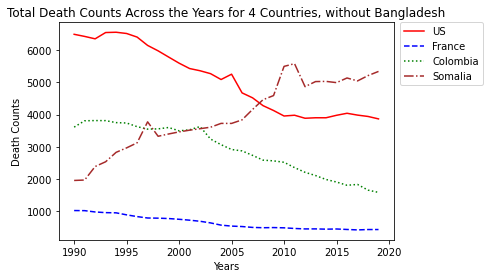

In [10]:
# Sample 2A - Showcase declining death counts over the years, combined into 1 plot but without Bangladesh
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 7))
plt.plot(US_new.index, US_new['Totals'],color = 'red', label = "US")
plt.plot(Fra_new.index, Fra_new['Totals'], color='blue', linestyle = 'dashed', label = "France")
plt.plot(Col_new.index, Col_new['Totals'], color='green',linestyle = 'dotted', label = 'Colombia')
plt.plot(Som_new.index, Som_new['Totals'], color='brown',linestyle = 'dashdot', label = 'Somalia') 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Total Death Counts Across the Years for 4 Countries, without Bangladesh')
plt.xlabel('Years')
plt.ylabel('Death Counts')
plt.show()

In [27]:
#Finding leading cause of death PER YEAR of the 5 countries, first section is US, then France, Colombia, Bangladesh, Somalia

countries_1 = [US_new, Fra_new, Col_new, Ban_new, Som_new]  

all_cause_of_dead_dict = {}   

years = range(30)

for country in countries_1 :  
     
    #Iterate from 1990 to 2019
    for index in years:
        causes_size = len(US_new.columns) - 1
        year = index + 1990    
        dead_count_by_year_dict = {}        
        
        #Iterate from self-harm to the end
        for i in range(causes_size) :
            dead_count_by_year_dict[country.columns[i]] = country.iat[index,i]
            
        leading_cause_by_year = max(dead_count_by_year_dict, key=dead_count_by_year_dict.get)
        
        print("Year: " + str(year) + " - Leading cause: " + leading_cause_by_year)
        
    print("==========")   

Year: 1990 - Leading cause: Road injuries
Year: 1991 - Leading cause: Road injuries
Year: 1992 - Leading cause: Road injuries
Year: 1993 - Leading cause: Road injuries
Year: 1994 - Leading cause: Road injuries
Year: 1995 - Leading cause: Road injuries
Year: 1996 - Leading cause: Road injuries
Year: 1997 - Leading cause: Road injuries
Year: 1998 - Leading cause: Road injuries
Year: 1999 - Leading cause: Road injuries
Year: 2000 - Leading cause: Road injuries
Year: 2001 - Leading cause: Road injuries
Year: 2002 - Leading cause: Road injuries
Year: 2003 - Leading cause: Road injuries
Year: 2004 - Leading cause: Road injuries
Year: 2005 - Leading cause: Road injuries
Year: 2006 - Leading cause: Road injuries
Year: 2007 - Leading cause: Road injuries
Year: 2008 - Leading cause: Neoplasms
Year: 2009 - Leading cause: Neoplasms
Year: 2010 - Leading cause: Neoplasms
Year: 2011 - Leading cause: Neoplasms
Year: 2012 - Leading cause: Neoplasms
Year: 2013 - Leading cause: Neoplasms
Year: 2014 - Lea

In [28]:
#Summarize all leading causes of death per year to find leading cause PER COUNTRY
import statistics as st

countries_1 = [US_new, Fra_new, Col_new, Ban_new, Som_new]  
countries_name = ["US", "France", "Colombia", "Bangladesh", "Somalia"]
all_cause_of_dead_dict = {}    
leading_cause_by_country = []
count = 0
    
for country in countries_1 :
    print(countries_name[count])
    # Iterate from 1990 to 2019
    for index in years:
        causes_size = len(US_new.columns) - 1
        year = index + 1990
        dead_count_by_year_dict = {}        

        # Iterate from self-harm to the end
        for i in range(causes_size) :
            dead_count_by_year_dict[country.columns[i]] = country.iat[index,i]
        #Find leading cause by year, store in dictionary, key = year, value = cause of dead
        leading_cause_by_year = max(dead_count_by_year_dict, key=dead_count_by_year_dict.get)
        #Store all leading cause by year into a list
        leading_cause_by_country.append(leading_cause_by_year)

    print("\tLeading cause: " + st.mode(leading_cause_by_country))

    leading_cause_by_country.clear()
    count = count+1

US
	Leading cause: Road injuries
France
	Leading cause: Neoplasms
Colombia
	Leading cause: Neoplasms
Bangladesh
	Leading cause: Drowning
Somalia
	Leading cause: Diarrheal diseases


In [29]:
#Identifying top 3 causes of death per year , first section is US, then France, Colombia, Bangladesh, Somalia

countries_1 = [US_new, Fra_new, Col_new, Ban_new, Som_new]  
all_cause_of_dead_dict = {}    

for country in countries_1 :
 
    # Iterate from 1990 to 2019
    for index in years:
        
        causes_size = len(US_new.columns) - 1
        year = index + 1990      
        dead_count_by_year_dict = {}        
        
        # Iterate from self-harm to the end
        for i in range(causes_size) :
            dead_count_by_year_dict[country.columns[i]] = country.iat[index,i]
         
        top_3 = sorted(dead_count_by_year_dict, key=dead_count_by_year_dict.get, reverse=True)[:3]

        print("Year " + str(year) +  " - " + str(top_3))
        
    print("=======")  

Year 1990 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1991 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1992 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1993 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1994 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1995 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1996 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1997 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1998 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 1999 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 2000 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 2001 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 2002 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 2003 - ['Road injuries', 'Neoplasms', 'Interpersonal violence']
Year 2004 - ['Road injuries', 'Neo

In [30]:
#Creating dictionary containing 5 countries values for ROAD INJURIES cause, across 30 years. 
years = range(30)

countries = [US, France, Colombia, Bangladesh, Somalia]

road_list = []
road_dict = {}

#Iterate over each year
for index in years:
    year = index + 1990
    #print("Year: " + str(index+1990))
    total_road = 0
    
    # Iterate over each country
    for country in countries :
        road_list.append(country['Road injuries'][index])
    
    road_dict[year] = list(road_list)
    road_list.clear()
     
#print(road_dict)

road_values5countries = pd.DataFrame.transpose(pd.DataFrame.from_dict(road_dict))
road_values5countries.columns = ['US', 'France', 'Colombia', 'Bangladesh', 'Somalia']
road_values5countries.head()

,US,France,Colombia,Bangladesh,Somalia
1990,2296,383,767,1123,126
1991,2239,374,774,1120,126
1992,2179,351,792,1185,142
1993,2194,339,826,1190,158
1994,2198,332,832,1237,172


In [31]:
#Creating dictionary containing 5 countries values for NEOPLASMS cause, across 30 years. 
neoplasm_list = []
neoplasm_dict = {}

#Iterate over each year
for index in years:
    year = index + 1990
    total_neoplasm = 0
    
    # Iterate over each country
    for country in countries :
        neoplasm_list.append(country['Neoplasms'][index])
    
    neoplasm_dict[year] = list(neoplasm_list)
    neoplasm_list.clear()

neoplasm_values5countries = pd.DataFrame.transpose(pd.DataFrame.from_dict(neoplasm_dict))
neoplasm_values5countries.columns = ['US', 'France', 'Colombia', 'Bangladesh', 'Somalia']
neoplasm_values5countries.head()

,US,France,Colombia,Bangladesh,Somalia
1990,1420,308,531,2269,47
1991,1410,307,531,2286,47
1992,1402,302,536,2407,53
1993,1414,297,564,2455,59
1994,1418,291,577,2521,64


In [32]:
#Creating dictionary containing 5 countries values for DROWNING cause, across 30 years. 
drowning_list = []
drowning_dict = {}

#Iterate over each year
for index in years:
    year = index + 1990
    total_drowning = 0
    
    # Iterate over each country
    for country in countries :
        drowning_list.append(country['Drowning'][index])
    
    drowning_dict[year] = list(drowning_list)
    drowning_list.clear()

drowning_values5countries = pd.DataFrame.transpose(pd.DataFrame.from_dict(drowning_dict))
drowning_values5countries.columns = ['US', 'France', 'Colombia', 'Bangladesh', 'Somalia']
drowning_values5countries.head()

,US,France,Colombia,Bangladesh,Somalia
1990,500,66,321,7909,58
1991,482,64,319,8131,58
1992,462,60,317,8536,65
1993,462,57,326,8688,72
1994,458,56,328,8867,78


In [33]:
#Creating dictionary containing 5 countries values for DIARRHEAL DISEASES cause, across 30 years. 
diarrheal_list = []
diarrheal_dict = {}

#Iterate over each year
for index in years:
    year = index + 1990
    total_diarrheal = 0
    
    # Iterate over each country
    for country in countries :
        diarrheal_list.append(country['Diarrheal diseases'][index])
    
    diarrheal_dict[year] = list(diarrheal_list)
    diarrheal_list.clear()

diarrheal_values5countries = pd.DataFrame.transpose(pd.DataFrame.from_dict(diarrheal_dict))
diarrheal_values5countries.columns = ['US', 'France', 'Colombia', 'Bangladesh', 'Somalia']
diarrheal_values5countries.head()

,US,France,Colombia,Bangladesh,Somalia
1990,4,3,128,5867,487
1991,4,3,123,5795,507
1992,4,3,117,5733,601
1993,4,3,114,5498,711
1994,4,3,105,5402,843


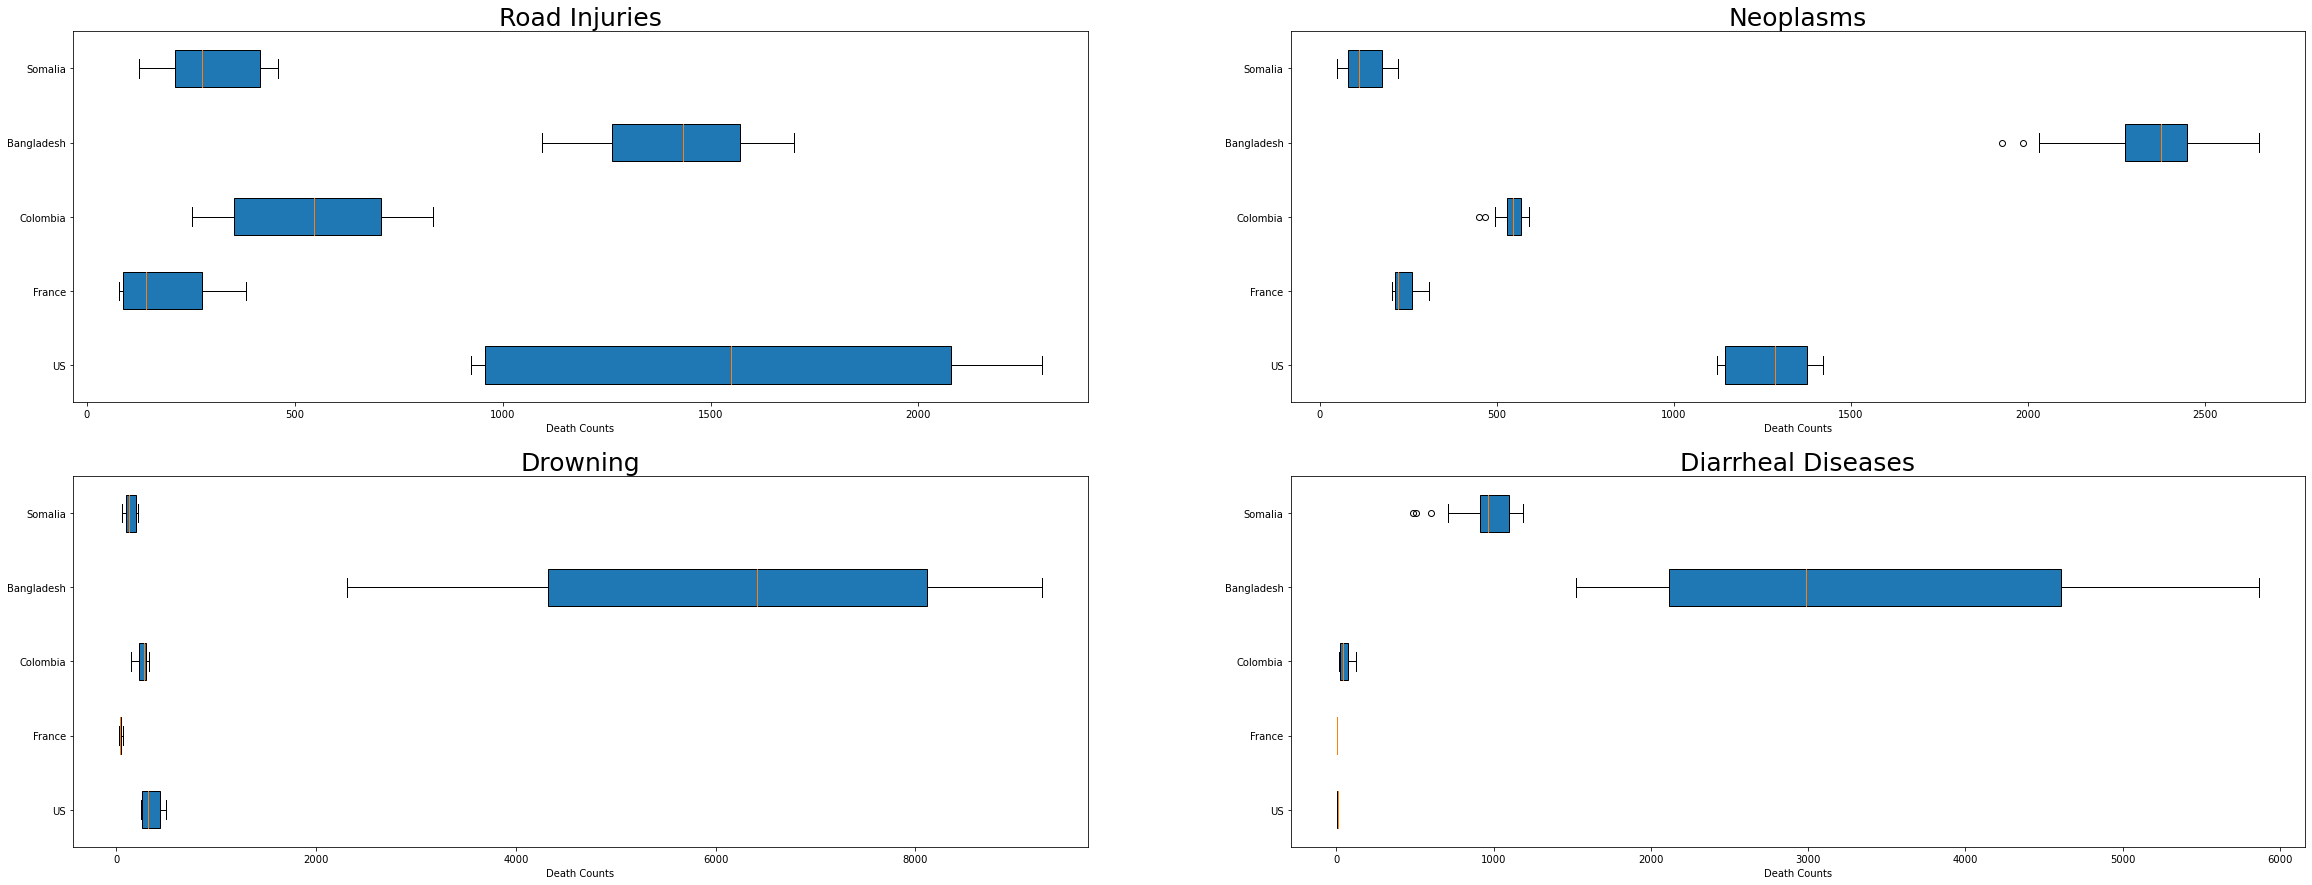

In [34]:
#create box plots for 5 stats (max, min, median, 1st quartile, 3rd quartile) for the 4 leading causes across 5 countries
#Not useful, excluded from report

import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(40,15)

colors = ['red', 'blue', 'green', 'yellow', 'brown']
labels = ['US', 'France', 'Colombia', 'Bangladesh', 'Somalia']

plt.subplot(2,2,1)
plt.boxplot(road_values5countries, vert=False,patch_artist=True,labels= labels)
plt.title('Road Injuries', fontsize=25)
plt.xlabel('Death Counts')

plt.subplot(2,2,2)
plt.boxplot(neoplasm_values5countries, vert=False,patch_artist=True,labels= labels)
plt.title('Neoplasms', fontsize=25)
plt.xlabel('Death Counts')

plt.subplot(2,2,3)
plt.boxplot(drowning_values5countries, vert=False,patch_artist=True,labels= labels)
plt.title('Drowning',  fontsize=25)
plt.xlabel('Death Counts')

plt.subplot(2,2,4)
plt.boxplot(diarrheal_values5countries, vert=False,patch_artist=True,labels= labels)
plt.title('Diarrheal Diseases',  fontsize=25)
plt.xlabel('Death Counts')

plt.show()

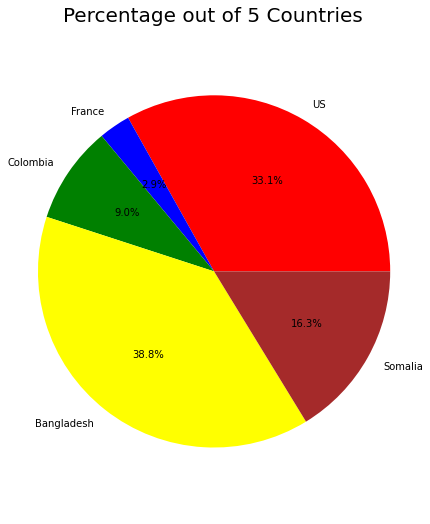

In [35]:
#Creating pie chart PER YEAR, for ONE cause. Example is for Road Injuries in 2019
#Not useful, excluded from report

import matplotlib.pyplot as plt

plt.figure(figsize=(7,9))

labels= ['US', 'France', 'Colombia', 'Bangladesh', 'Somalia']
colors=['red', 'blue', 'green', 'yellow', 'brown']

#sizes= len(self_harm_list)

plt.pie(road_dict[2019],
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Percentage out of 5 Countries', fontsize=20)
plt.show()

In [63]:
#Create percentages values for all causes for 5 countries, use print function to see results

#US
global dead_count_by_year_dict_US
dead_count_by_year_dict_US = {}

for index in years:
    causes_size = len(US_new.columns) - 1
    year = index + 1990 
    dead_count_by_percentage = []

    for i in range(causes_size) :
        cause_percentage = round((US_new.iat[index,i]) / (US_new.iat[index, causes_size]),4) * 100    
        dead_count_by_percentage.append(cause_percentage)
    dead_count_by_year_dict_US[year] = list(dead_count_by_percentage)

new_df_US = pd.DataFrame.transpose(pd.DataFrame.from_dict(dead_count_by_year_dict_US))

#France
global dead_count_by_year_dict_Fra
dead_count_by_year_dict_Fra = {}

for index in years:
    causes_size = len(Fra_new.columns) - 1
    year = index + 1990 
    dead_count_by_percentage = []

    for i in range(causes_size) :
        cause_percentage = round((Fra_new.iat[index,i]) / (Fra_new.iat[index, causes_size]),4) * 100      
        dead_count_by_percentage.append(cause_percentage)
    dead_count_by_year_dict_Fra[year] = list(dead_count_by_percentage)

new_df_Fra = pd.DataFrame.transpose(pd.DataFrame.from_dict(dead_count_by_year_dict_Fra))

#Colombia
global dead_count_by_year_dict_Col
dead_count_by_year_dict_Col = {}

for index in years:
    causes_size = len(Col_new.columns) - 1
    year = index + 1990 
    dead_count_by_percentage = []

    for i in range(causes_size) :
        cause_percentage = round((Col_new.iat[index,i]) / (Col_new.iat[index, causes_size]),4) * 100      
        dead_count_by_percentage.append(cause_percentage)
    dead_count_by_year_dict_Col[year] = list(dead_count_by_percentage)

new_df_Col = pd.DataFrame.transpose(pd.DataFrame.from_dict(dead_count_by_year_dict_Col))

#Bangladesh
global dead_count_by_year_dict_Ban
dead_count_by_year_dict_Ban = {}

for index in years:
    causes_size = len(Ban_new.columns) - 1
    year = index + 1990 
    dead_count_by_percentage = []

    for i in range(causes_size) :
        cause_percentage = round((Ban_new.iat[index,i]) / (Ban_new.iat[index, causes_size]),4) * 100      
        dead_count_by_percentage.append(cause_percentage)
    dead_count_by_year_dict_Ban[year] = list(dead_count_by_percentage)

new_df_Ban = pd.DataFrame.transpose(pd.DataFrame.from_dict(dead_count_by_year_dict_Ban))

#Somalia
global dead_count_by_year_dict_Som
dead_count_by_year_dict_Som = {}

for index in years:
    causes_size = len(Som_new.columns) - 1
    year = index + 1990 
    dead_count_by_percentage = []

    for i in range(causes_size) :
        cause_percentage = round((Som_new.iat[index,i]) / (Som_new.iat[index, causes_size]),4) * 100       
        dead_count_by_percentage.append(cause_percentage)
    dead_count_by_year_dict_Som[year] = list(dead_count_by_percentage)

new_df_Som = pd.DataFrame.transpose(pd.DataFrame.from_dict(dead_count_by_year_dict_Som))

#Add column names to all new dfs
new_df_US.columns = list(base.columns)
new_df_Fra.columns = list(base.columns)
new_df_Col.columns = list(base.columns)
new_df_Ban.columns = list(base.columns)
new_df_Som.columns = list(base.columns)

#print(new_df_US, new_df_Fra, new_df_Col, new_df_Ban, new_df_Ban)

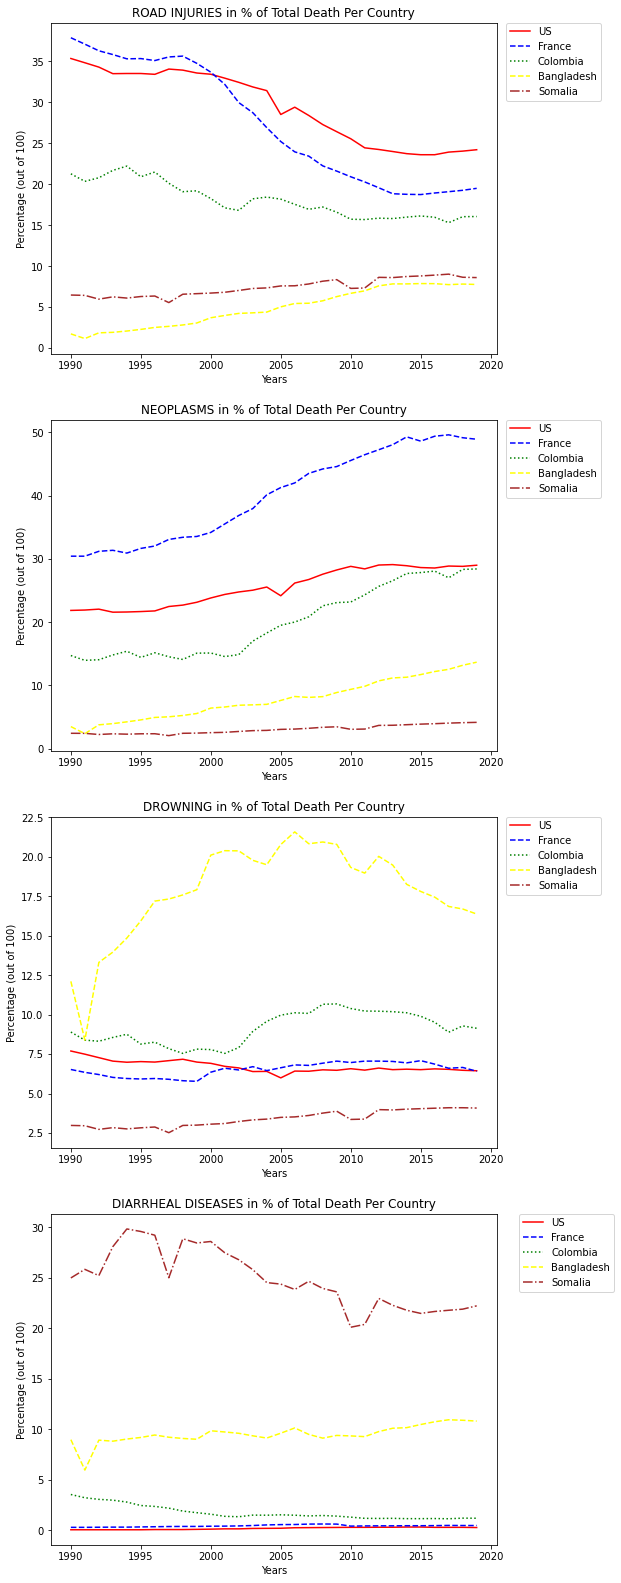

In [37]:
#Line graphs with percentage of each country over the years for 4 leading causes

figure, axis = plt.subplots(4)
figure.set_size_inches(8,28)

axis[0].plot(new_df_US.index, new_df_US['Road injuries'],color = 'red', label = "US")
axis[0].plot(new_df_Fra.index, new_df_Fra['Road injuries'], color='blue', linestyle = 'dashed', label = "France")
axis[0].plot(new_df_Col.index, new_df_Col['Road injuries'], color='green',linestyle = 'dotted', label = 'Colombia')
axis[0].plot(new_df_Ban.index, new_df_Ban['Road injuries'], color='yellow',linestyle = 'dashed', label = 'Bangladesh')
axis[0].plot(new_df_Som.index, new_df_Som['Road injuries'], color='brown',linestyle = 'dashdot', label = 'Somalia') 
axis[0].set_title('ROAD INJURIES in % of Total Death Per Country')
axis[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axis[0].set_xlabel('Years')
axis[0].set_ylabel('Percentage (out of 100)')

axis[1].plot(new_df_US.index, new_df_US['Neoplasms'],color = 'red', label = "US")
axis[1].plot(new_df_Fra.index, new_df_Fra['Neoplasms'], color='blue', linestyle = 'dashed', label = "France")
axis[1].plot(new_df_Col.index, new_df_Col['Neoplasms'], color='green',linestyle = 'dotted', label = 'Colombia')
axis[1].plot(new_df_Ban.index, new_df_Ban['Neoplasms'], color='yellow',linestyle = 'dashed', label = 'Bangladesh')
axis[1].plot(new_df_Som.index, new_df_Som['Neoplasms'], color='brown',linestyle = 'dashdot', label = 'Somalia') 
axis[1].set_title('NEOPLASMS in % of Total Death Per Country')
axis[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axis[1].set_xlabel('Years')
axis[1].set_ylabel('Percentage (out of 100)')

axis[2].plot(new_df_US.index, new_df_US['Drowning'],color = 'red', label = "US")
axis[2].plot(new_df_Fra.index, new_df_Fra['Drowning'], color='blue', linestyle = 'dashed', label = "France")
axis[2].plot(new_df_Col.index, new_df_Col['Drowning'], color='green',linestyle = 'dotted', label = 'Colombia')
axis[2].plot(new_df_Ban.index, new_df_Ban['Drowning'], color='yellow',linestyle = 'dashed', label = 'Bangladesh')
axis[2].plot(new_df_Som.index, new_df_Som['Drowning'], color='brown',linestyle = 'dashdot', label = 'Somalia') 
axis[2].set_title('DROWNING in % of Total Death Per Country')
axis[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axis[2].set_xlabel('Years')
axis[2].set_ylabel('Percentage (out of 100)')

axis[3].plot(new_df_US.index, new_df_US['Diarrheal diseases'],color = 'red', label = "US")
axis[3].plot(new_df_Fra.index, new_df_Fra['Diarrheal diseases'], color='blue', linestyle = 'dashed', label = "France")
axis[3].plot(new_df_Col.index, new_df_Col['Diarrheal diseases'], color='green',linestyle = 'dotted', label = 'Colombia')
axis[3].plot(new_df_Ban.index, new_df_Ban['Diarrheal diseases'], color='yellow',linestyle = 'dashed', label = 'Bangladesh')
axis[3].plot(new_df_Som.index, new_df_Som['Diarrheal diseases'], color='brown',linestyle = 'dashdot', label = 'Somalia') 
axis[3].set_title('DIARRHEAL DISEASES in % of Total Death Per Country')
axis[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axis[3].set_xlabel('Years')
axis[3].set_ylabel('Percentage (out of 100)')

plt.show()

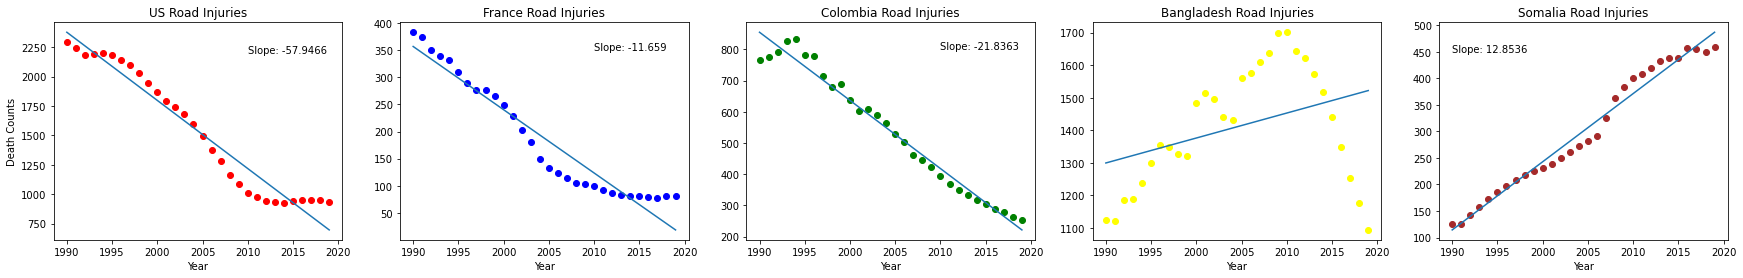

In [38]:
#Line of best fit for each country for ROAD INJURIES

figure, axis = plt.subplots(1,5)
figure.set_size_inches(30,4)

#US
fit_us = np.polyfit(np.arange(US_new.index.size),US_new['Road injuries'],deg=1)

#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit_us)
axis[0].scatter(US_new.index, US_new['Road injuries'], color='red')
axis[0].plot(US_new.index, fit_function(np.arange(US_new.index.size)))
axis[0].text(2010, 2200, 'Slope: ' + str(round(fit_us[0],4)))
axis[0].set_xlabel('Year')
axis[0].set_ylabel('Death Counts')
axis[0].set_title('US Road Injuries')

#France
fit_fra = np.polyfit(np.arange(Fra_new.index.size),Fra_new['Road injuries'],deg=1)
fit_function = np.poly1d(fit_fra)
axis[1].scatter(Fra_new.index, Fra_new['Road injuries'], color='blue')
axis[1].plot(Fra_new.index, fit_function(np.arange(Fra_new.index.size)))
axis[1].text(2010, 350, 'Slope: ' + str(round(fit_fra[0],4)))
axis[1].set_xlabel('Year')
axis[1].set_title('France Road Injuries')

#Colombia
fit_col = np.polyfit(np.arange(Col_new.index.size),Col_new['Road injuries'],deg=1)
fit_function = np.poly1d(fit_col)
axis[2].scatter(Col_new.index, Col_new['Road injuries'], color='green')
axis[2].plot(Col_new.index, fit_function(np.arange(Col_new.index.size)))
axis[2].text(2010, 800, 'Slope: ' + str(round(fit_col[0],4)))
axis[2].set_xlabel('Year')
axis[2].set_title('Colombia Road Injuries')

#Bangladesh
fit_ban = np.polyfit(np.arange(Ban_new.index.size),Ban_new['Road injuries'],deg=1)
fit_function = np.poly1d(fit_ban)
axis[3].scatter(Ban_new.index, Ban_new['Road injuries'], color='yellow')
axis[3].plot(Ban_new.index, fit_function(np.arange(Ban_new.index.size)))
axis[3].set_xlabel('Year')
axis[3].set_title('Bangladesh Road Injuries')

#Somalia
fit_som = np.polyfit(np.arange(Som_new.index.size),Som_new['Road injuries'],deg=1)
fit_function = np.poly1d(fit_som)
axis[4].scatter(Som_new.index, Som_new['Road injuries'], color='brown')
axis[4].plot(Som_new.index, fit_function(np.arange(Som_new.index.size)))
axis[4].text(1990, 450, 'Slope: ' + str(round(fit_som[0],4)))
axis[4].set_xlabel('Year')
axis[4].set_title('Somalia Road Injuries')

plt.show()

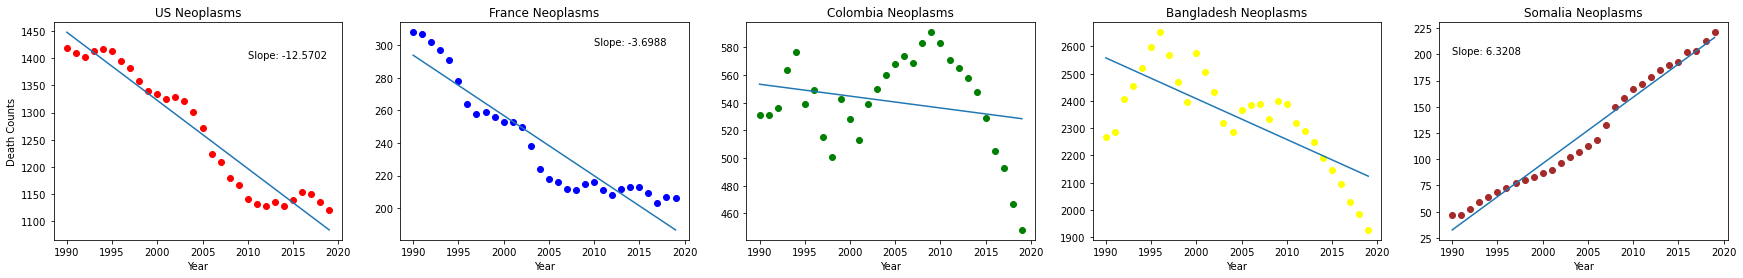

In [39]:
#Line of best fit for each country for NEOPLASMS

figure, axis = plt.subplots(1,5)
figure.set_size_inches(30,4)

#US
fit_us1 = np.polyfit(np.arange(US_new.index.size),US_new['Neoplasms'],deg=1)

#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit_us1)
axis[0].scatter(US_new.index, US_new['Neoplasms'], color='red')
axis[0].plot(US_new.index, fit_function(np.arange(US_new.index.size)))
axis[0].text(2010, 1400, 'Slope: ' + str(round(fit_us1[0],4)))
axis[0].set_xlabel('Year')
axis[0].set_ylabel('Death Counts')
axis[0].set_title('US Neoplasms')

#France
fit_fra1 = np.polyfit(np.arange(Fra_new.index.size),Fra_new['Neoplasms'],deg=1)
fit_function = np.poly1d(fit_fra1)
axis[1].scatter(Fra_new.index, Fra_new['Neoplasms'], color='blue')
axis[1].plot(Fra_new.index, fit_function(np.arange(Fra_new.index.size)))
axis[1].text(2010, 300, 'Slope: ' + str(round(fit_fra1[0],4)))
axis[1].set_xlabel('Year')
axis[1].set_title('France Neoplasms')

#Colombia
fit_col1 = np.polyfit(np.arange(Col_new.index.size),Col_new['Neoplasms'],deg=1)
fit_function = np.poly1d(fit_col1)
axis[2].scatter(Col_new.index, Col_new['Neoplasms'], color='green')
axis[2].plot(Col_new.index, fit_function(np.arange(Col_new.index.size)))
axis[2].set_xlabel('Year')
axis[2].set_title('Colombia Neoplasms')

#Bangladesh
fit_ban1 = np.polyfit(np.arange(Ban_new.index.size),Ban_new['Neoplasms'],deg=1)
fit_function = np.poly1d(fit_ban1)
axis[3].scatter(Ban_new.index, Ban_new['Neoplasms'], color='yellow')
axis[3].plot(Ban_new.index, fit_function(np.arange(Ban_new.index.size)))
axis[3].set_xlabel('Year')
axis[3].set_title('Bangladesh Neoplasms')

#Somalia
fit_som1 = np.polyfit(np.arange(Som_new.index.size),Som_new['Neoplasms'],deg=1)
fit_function = np.poly1d(fit_som1)
axis[4].scatter(Som_new.index, Som_new['Neoplasms'], color='brown')
axis[4].plot(Som_new.index, fit_function(np.arange(Som_new.index.size)))
axis[4].text(1990, 200, 'Slope: ' + str(round(fit_som1[0],4)))
axis[4].set_xlabel('Year')
axis[4].set_title('Somalia Neoplasms')

plt.show()

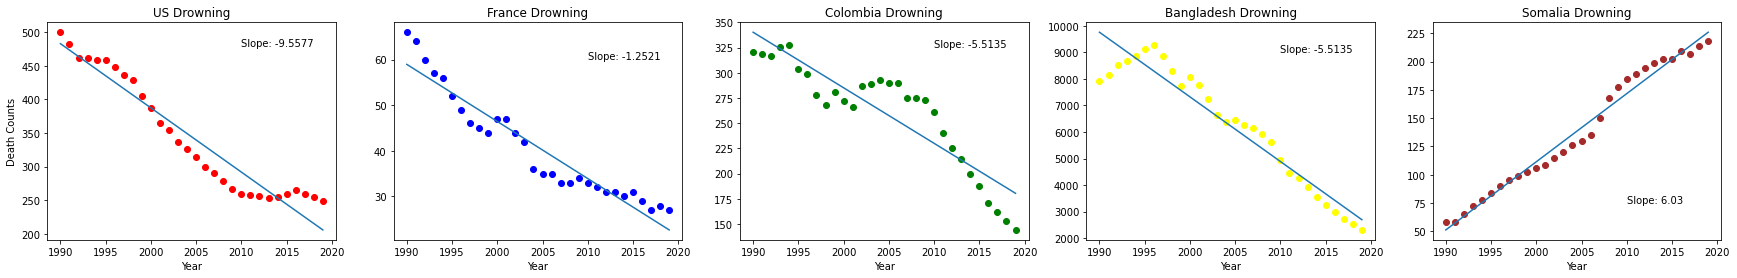

In [40]:
#Line of best fit for each country for DROWNING

figure, axis = plt.subplots(1,5)
figure.set_size_inches(30,4)

#US
fit_us2 = np.polyfit(np.arange(US_new.index.size),US_new['Drowning'],deg=1)

#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit_us2)
axis[0].scatter(US_new.index, US_new['Drowning'], color='red')
axis[0].plot(US_new.index, fit_function(np.arange(US_new.index.size)))
axis[0].text(2010, 480, 'Slope: ' + str(round(fit_us2[0],4)))
axis[0].set_xlabel('Year')
axis[0].set_ylabel('Death Counts')
axis[0].set_title('US Drowning')

#France
fit_fra2 = np.polyfit(np.arange(Fra_new.index.size),Fra_new['Drowning'],deg=1)
fit_function = np.poly1d(fit_fra2)
axis[1].scatter(Fra_new.index, Fra_new['Drowning'], color='blue')
axis[1].plot(Fra_new.index, fit_function(np.arange(Fra_new.index.size)))
axis[1].text(2010, 60, 'Slope: ' + str(round(fit_fra2[0],4)))
axis[1].set_xlabel('Year')
axis[1].set_title('France Drowning')

#Colombia
fit_col2 = np.polyfit(np.arange(Col_new.index.size),Col_new['Drowning'],deg=1)
fit_function = np.poly1d(fit_col2)
axis[2].scatter(Col_new.index, Col_new['Drowning'], color='green')
axis[2].plot(Col_new.index, fit_function(np.arange(Col_new.index.size)))
axis[2].text(2010, 325, 'Slope: ' + str(round(fit_col2[0],4)))
axis[2].set_xlabel('Year')
axis[2].set_title('Colombia Drowning')

#Bangladesh
fit_ban2 = np.polyfit(np.arange(Ban_new.index.size),Ban_new['Drowning'],deg=1)
fit_function = np.poly1d(fit_ban2)
axis[3].scatter(Ban_new.index, Ban_new['Drowning'], color='yellow')
axis[3].plot(Ban_new.index, fit_function(np.arange(Ban_new.index.size)))
axis[3].text(2010, 9000, 'Slope: ' + str(round(fit_col2[0],4)))
axis[3].set_xlabel('Year')
axis[3].set_title('Bangladesh Drowning')

#Somalia
fit_som2 = np.polyfit(np.arange(Som_new.index.size),Som_new['Drowning'],deg=1)
fit_function = np.poly1d(fit_som2)
axis[4].scatter(Som_new.index, Som_new['Drowning'], color='brown')
axis[4].plot(Som_new.index, fit_function(np.arange(Som_new.index.size)))
axis[4].text(2010, 75, 'Slope: ' + str(round(fit_som2[0],4)))
axis[4].set_xlabel('Year')
axis[4].set_title('Somalia Drowning')

plt.show()

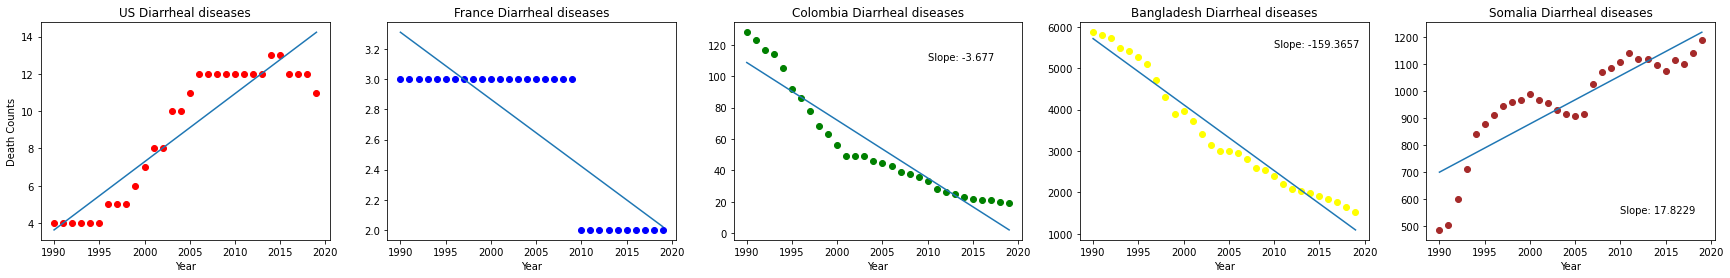

In [41]:
#Line of best fit for each country for DIARRHEAL DISEASES

figure, axis = plt.subplots(1,5)
figure.set_size_inches(30,4)

#US
fit_us3 = np.polyfit(np.arange(US_new.index.size),US_new['Diarrheal diseases'],deg=1)
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit_us3)
axis[0].scatter(US_new.index, US_new['Diarrheal diseases'], color='red')
axis[0].plot(US_new.index, fit_function(np.arange(US_new.index.size)))
axis[0].set_xlabel('Year')
axis[0].set_ylabel('Death Counts')
axis[0].set_title('US Diarrheal diseases')

#France
fit_fra3 = np.polyfit(np.arange(Fra_new.index.size),Fra_new['Diarrheal diseases'],deg=1)
fit_function = np.poly1d(fit_fra3)
axis[1].scatter(Fra_new.index, Fra_new['Diarrheal diseases'], color='blue')
axis[1].plot(Fra_new.index, fit_function(np.arange(Fra_new.index.size)))
axis[1].set_xlabel('Year')
axis[1].set_title('France Diarrheal diseases')

#Colombia
fit_col3 = np.polyfit(np.arange(Col_new.index.size),Col_new['Diarrheal diseases'],deg=1)
fit_function = np.poly1d(fit_col3)
axis[2].scatter(Col_new.index, Col_new['Diarrheal diseases'], color='green')
axis[2].plot(Col_new.index, fit_function(np.arange(Col_new.index.size)))
axis[2].text(2010, 110, 'Slope: ' + str(round(fit_col3[0],4)))
axis[2].set_xlabel('Year')
axis[2].set_title('Colombia Diarrheal diseases')

#Bangladesh
fit_ban3 = np.polyfit(np.arange(Ban_new.index.size),Ban_new['Diarrheal diseases'],deg=1)
fit_function = np.poly1d(fit_ban3)
axis[3].scatter(Ban_new.index, Ban_new['Diarrheal diseases'], color='yellow')
axis[3].plot(Ban_new.index, fit_function(np.arange(Ban_new.index.size)))
axis[3].text(2010, 5500, 'Slope: ' + str(round(fit_ban3[0],4)))
axis[3].set_xlabel('Year')
axis[3].set_title('Bangladesh Diarrheal diseases')

#Somalia
fit_som3 = np.polyfit(np.arange(Som_new.index.size),Som_new['Diarrheal diseases'],deg=1)
fit_function = np.poly1d(fit_som3)
axis[4].scatter(Som_new.index, Som_new['Diarrheal diseases'], color='brown')
axis[4].plot(Som_new.index, fit_function(np.arange(Som_new.index.size)))
axis[4].text(2010, 550, 'Slope: ' + str(round(fit_som3[0],4)))
axis[4].set_xlabel('Year')
axis[4].set_title('Somalia Diarrheal diseases')

plt.show()

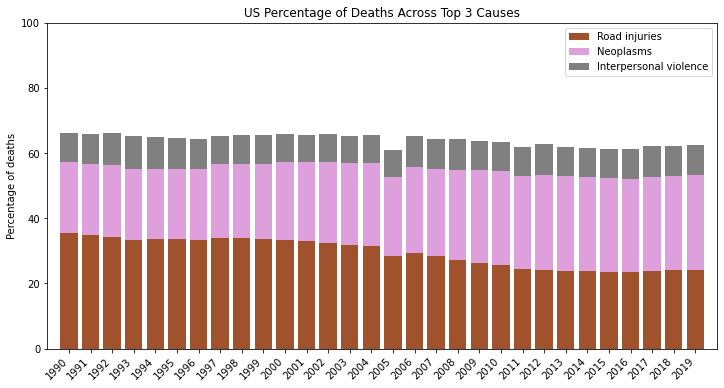

In [115]:
#creating stacked bar chart for US

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

ax.bar(new_df_US.index, new_df_US['Road injuries'], label= 'Road injuries', color = 'sienna')
ax.bar(new_df_US.index, new_df_US['Neoplasms'], bottom= new_df_US['Road injuries'] , label= 'Neoplasms', color='plum')
ax.bar(new_df_US.index, new_df_US['Interpersonal violence'], bottom=new_df_US['Road injuries']+new_df_US['Neoplasms'],label= 'Interpersonal violence', color='gray')
ax.axis([1989, 2020, 0,100])
ax.set_xticks((1990+np.arange(len(new_df_US))),labels = new_df_US.index, rotation=45, ha='right')
ax.set_ylabel('Percentage of deaths')
ax.legend()
ax.set_title('US Percentage of Deaths Across Top 3 Causes')
plt.show()

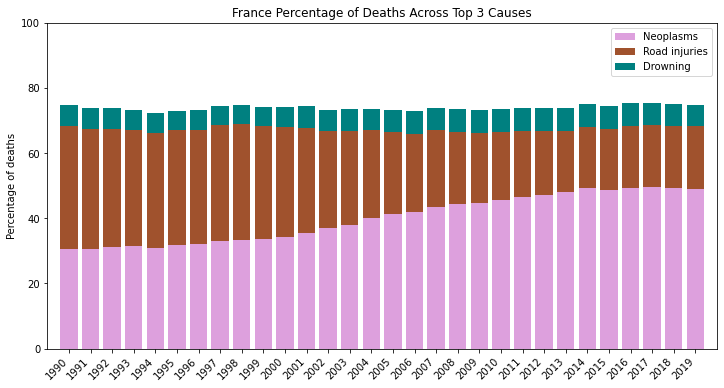

In [113]:
#creating stacked bar chart for France

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

ax.bar(new_df_Fra.index, new_df_Fra['Neoplasms'], label= 'Neoplasms', color='plum')
ax.bar(new_df_Fra.index, new_df_Fra['Road injuries'], bottom= new_df_Fra['Neoplasms'],label= 'Road injuries', color = 'sienna')
ax.bar(new_df_Fra.index, new_df_Fra['Drowning'], bottom= new_df_Fra['Neoplasms']+new_df_Fra['Road injuries'],label= 'Drowning',color='teal' )
ax.axis([1989, 2020, 0,100])
ax.set_xticks((1990+np.arange(len(new_df_Fra))),labels = new_df_Fra.index, rotation=45, ha='right')
ax.set_ylabel('Percentage of deaths')
ax.legend()
ax.set_title('France Percentage of Deaths Across Top 3 Causes')
plt.show()

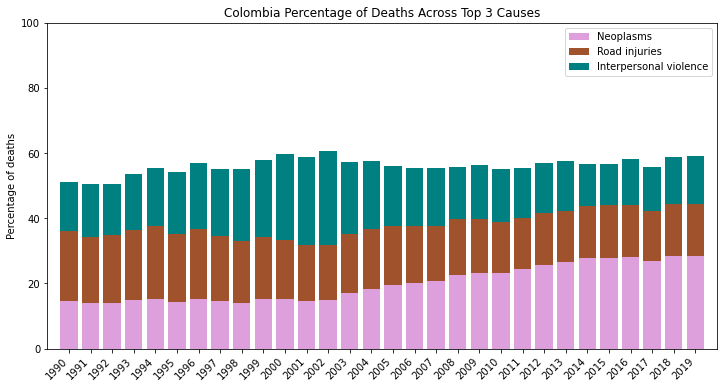

In [116]:
#creating stacked bar chart for Colombia

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

ax.bar(new_df_Col.index, new_df_Col['Neoplasms'], label= 'Neoplasms', color='plum')
ax.bar(new_df_Col.index, new_df_Col['Road injuries'], bottom= new_df_Col['Neoplasms'],label= 'Road injuries', color = 'sienna')
ax.bar(new_df_Col.index, new_df_Col['Interpersonal violence'], bottom= new_df_Col['Neoplasms']+new_df_Col['Road injuries'],label= 'Interpersonal violence',color='teal' )
ax.axis([1989, 2020, 0,100])
ax.set_xticks((1990+np.arange(len(new_df_Col))),labels = new_df_Col.index, rotation=45, ha='right')
ax.set_ylabel('Percentage of deaths')
ax.legend()
ax.set_title('Colombia Percentage of Deaths Across Top 3 Causes')
plt.show()

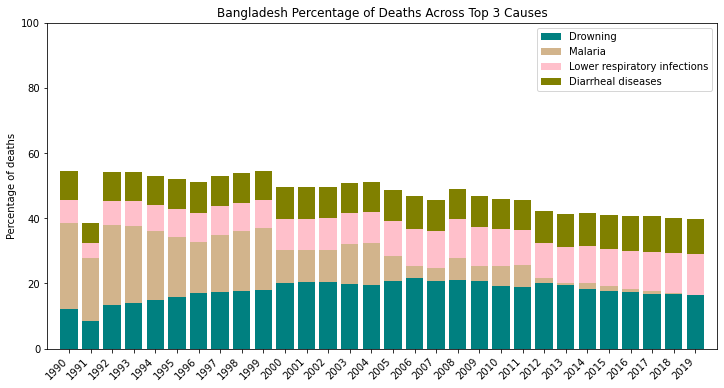

In [121]:
#creating stacked bar chart for Bangladesh

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

ax.bar(new_df_Ban.index, new_df_Ban['Drowning'], label= 'Drowning', color='teal')
ax.bar(new_df_Ban.index, new_df_Ban['Malaria'], bottom= new_df_Ban['Drowning'],label= 'Malaria', color = 'tan')
ax.bar(new_df_Ban.index, new_df_Ban['Lower respiratory infections'], bottom= new_df_Ban['Drowning']+new_df_Ban['Malaria'],label= 'Lower respiratory infections',color='pink' )
ax.bar(new_df_Ban.index, new_df_Ban['Diarrheal diseases'], bottom= new_df_Ban['Drowning']+new_df_Ban['Malaria']+new_df_Ban['Lower respiratory infections'],label= 'Diarrheal diseases',color='olive' )
ax.axis([1989, 2020, 0,100])
ax.set_xticks((1990+np.arange(len(new_df_Ban))),labels = new_df_Ban.index, rotation=45, ha='right')
ax.set_ylabel('Percentage of deaths')
ax.legend()
ax.set_title('Bangladesh Percentage of Deaths Across Top 3 Causes')
plt.show()

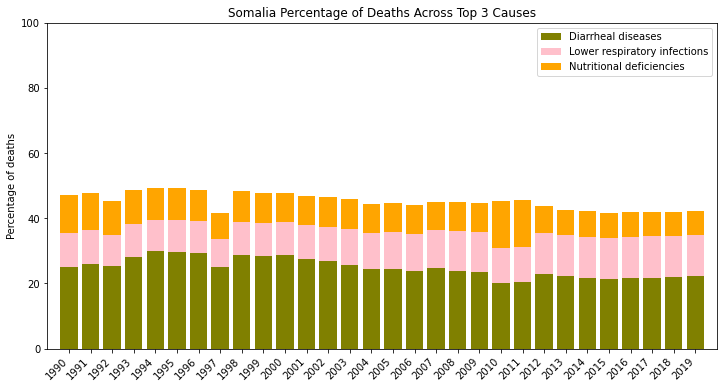

In [125]:
#creating stacked bar chart for Somalia

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

ax.bar(new_df_Som.index, new_df_Som['Diarrheal diseases'], label= 'Diarrheal diseases', color='olive')
ax.bar(new_df_Som.index, new_df_Som['Lower respiratory infections'], bottom= new_df_Som['Diarrheal diseases'],label= 'Lower respiratory infections', color = 'pink')
ax.bar(new_df_Som.index, new_df_Som['Nutritional deficiencies'], bottom= new_df_Som['Diarrheal diseases']+new_df_Som['Lower respiratory infections'],label= 'Nutritional deficiencies',color='orange' )
ax.axis([1989, 2020, 0,100])
ax.set_xticks((1990+np.arange(len(new_df_Som))),labels = new_df_Som.index, rotation=45, ha='right')
ax.set_ylabel('Percentage of deaths')
ax.legend()
ax.set_title('Somalia Percentage of Deaths Across Top 3 Causes')
plt.show()